In [26]:
import re
import zipfile
import numpy as np
import pandas as pd
import gensim
from tqdm import tqdm

import src.utils as utils


In [15]:
df = pd.read_csv('dataset/lenta-news-25k.csv')

## Fit Word2Vec and FastText 
### 300-dim vectors

In [3]:
w2v = gensim.models.Word2Vec(df['tokenize_text'], size=300, seed=55,)
fasttext = gensim.models.FastText(df['tokenize_text'], size=300, seed=55, min_n=2)

In [6]:
data = []
for i, row in tqdm(df.iterrows()):
    data.append({'w2v': utils.mean_vector(row['tokenize_text'], w2v),\
                 'fasttext': utils.mean_vector(row['tokenize_text'], fasttext)})

24996it [03:21, 124.12it/s]


In [7]:
w2v_vec = np.array([])
w2v_vec = np.array([np.concatenate((w2v_vec, vec['w2v'])) for vec in data]).reshape(len(data), 300)
ft_vec = np.array([])
ft_vec = np.array([np.concatenate((ft_vec, vec['fasttext'])) for vec in data]).reshape(len(data), 300)

In [11]:
w2v_lab = utils.fit_kmeans(w2v_vec, 10)
ft_lab = utils.fit_kmeans(ft_vec, 10)

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

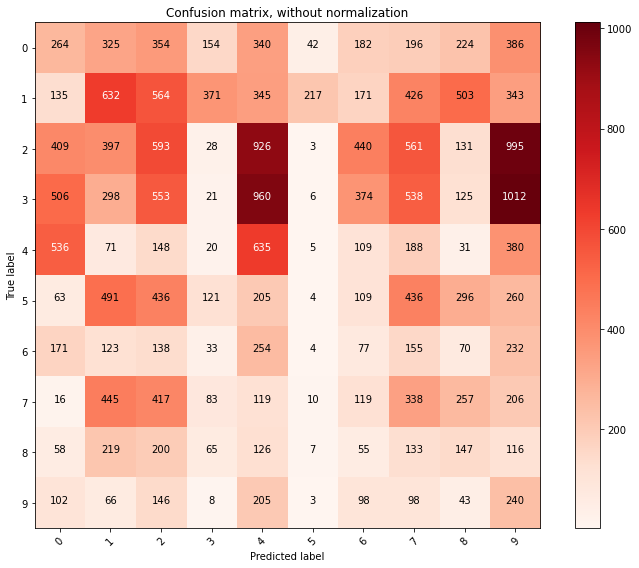

In [14]:
cm = confusion_matrix(df['labels'], w2v_lab)
utils.plot_confusion_matrix(cm, classes=range(10))

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

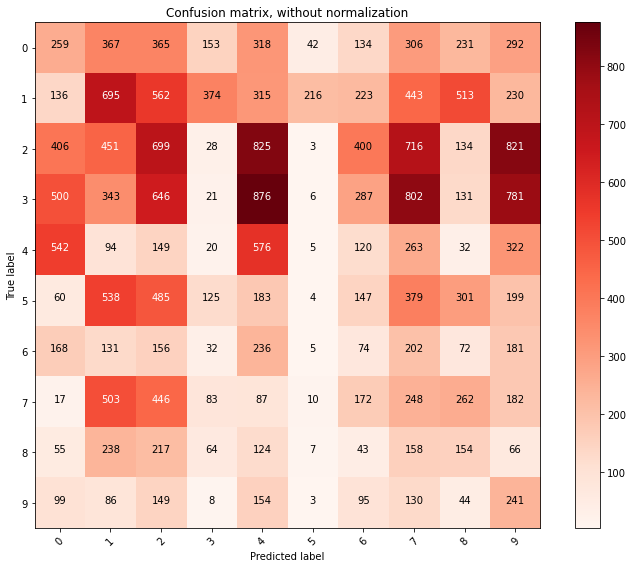

In [15]:
cm = confusion_matrix(df['labels'], ft_lab)
utils.plot_confusion_matrix(cm, classes=range(10))

### 100-dim vectors

In [16]:
w2v = gensim.models.Word2Vec(df['tokenize_text'], size=100, seed=55,)
fasttext = gensim.models.FastText(df['tokenize_text'], size=100, seed=55)

In [17]:
data = []
for i, row in tqdm(df.iterrows()):
    data.append({'w2v': utils.mean_vector(row['tokenize_text'], w2v),\
                 'fasttext': utils.mean_vector(row['tokenize_text'], fasttext)})

24996it [03:03, 135.93it/s]


In [18]:
w2v_vec = np.array([])
w2v_vec = np.array([np.concatenate((w2v_vec, vec['w2v'])) for vec in data]).reshape(len(data), 100)
ft_vec = np.array([])
ft_vec = np.array([np.concatenate((ft_vec, vec['fasttext'])) for vec in data]).reshape(len(data), 100)

In [19]:
w2v_lab = utils.fit_kmeans(w2v_vec, 10)
ft_lab = utils.fit_kmeans(ft_vec, 10)

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

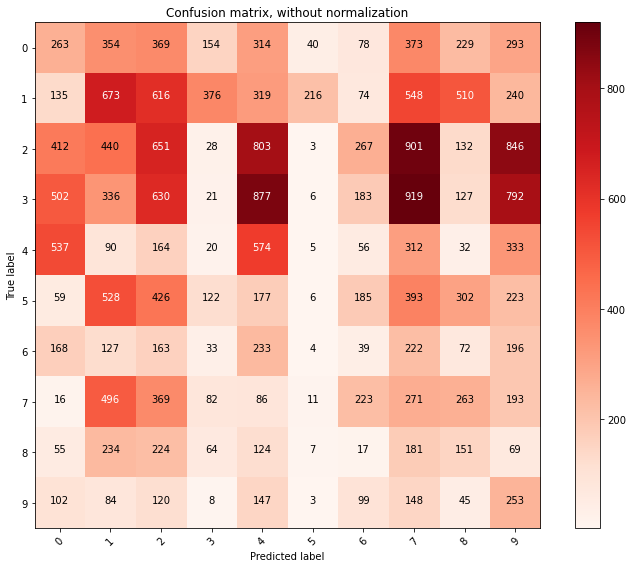

In [21]:
cm = confusion_matrix(df['labels'], w2v_lab)
utils.plot_confusion_matrix(cm, classes=range(10))

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

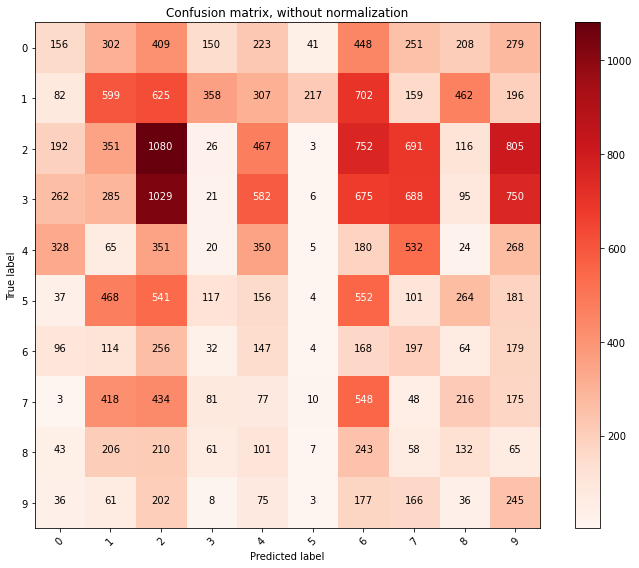

In [20]:
cm = confusion_matrix(df['labels'], ft_lab)
utils.plot_confusion_matrix(cm, classes=range(10))

## Pretraining Word2Vec
#### rusvectors

In [3]:
model_file = r"D:/download/184.zip"
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

In [11]:
model.vocab = utils.delete_pos_tag(model.vocab)

In [19]:
data = []
for i, row in tqdm(df.iterrows()):
    data.append({'w2v': utils.mean_vector(row['tokenize_text'], model)})

0it [00:00, ?it/s]C:\Users\Nersirion\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
24996it [04:43, 88.22it/s] 


In [21]:
w2v_vec = np.array([])
w2v_vec = np.array([np.concatenate((w2v_vec, vec['w2v'])) for vec in data]).reshape(len(data), 300)

In [23]:
w2v_lab = utils.fit_kmeans(w2v_vec, 10)


<Figure size 432x288 with 0 Axes>

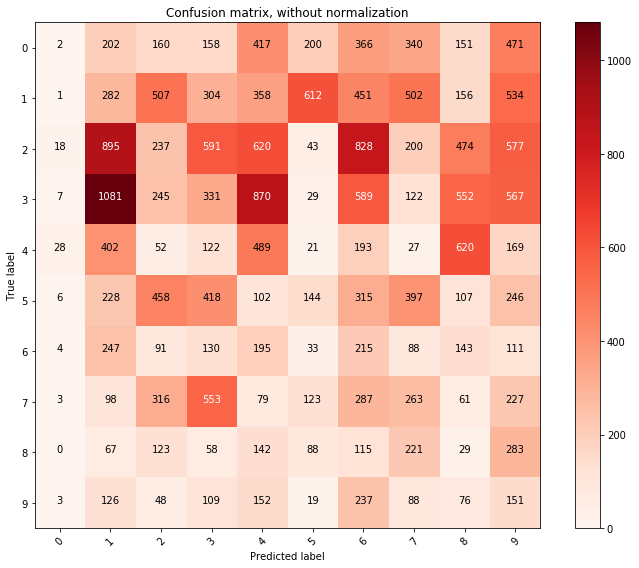

In [27]:
cm = confusion_matrix(df['labels'], w2v_lab)
utils.plot_confusion_matrix(cm, classes=range(10))